In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures   #StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import Lasso, Ridge, LinearRegression as LR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, explained_variance_score as EVS, mean_squared_error as MSE

In [ ]:
data = pd.read_csv("data_final.csv")
x = data[['wind', 'fuel', 'coal']]
y = data['power']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train.shape

(106, 3)

In [ ]:
reg = LR().fit(x_train, y_train)
yhat = reg.predict(x_test)
yhat

array([ 8.28593501,  2.76301807,  5.77700501,  4.51113582,  2.80958036,
       20.34091286,  5.78280876, -2.26314281, 21.18881897, 19.48874246,
        4.92744993, 17.07474187, 27.09916814,  6.24637012,  5.90189598,
        4.87786154,  5.0016045 ,  4.22393662, -2.6340794 ,  5.31710945,
       17.36560757,  5.36566856, 12.63088038,  4.6346121 , 22.31181129,
        2.8676401 ,  3.28903929])

In [ ]:
# linear
print(reg.coef_)
print(reg.intercept_)


# validation
MSE = MSE(yhat, y_test)
error = np.sqrt(MSE(y_test, yhat))/y_test.mean()
cross_validation_score = -cross_val_score(reg, x,y,cv=5, scoring="neg_mean_squared_error")  # scoring="explained_variance"
r2_score = r2_score(y_test, yhat)
r2 = reg.score(x_test,y_test)
EVS(y_test,yhat)

[-0.42642798 20.13158289  0.0695061 ]


In [ ]:
# non linear regression
def non_linear(n):
  
  po = PolynomialFeatures(degree=n, interaction_only=False, include_bias=False)
  x_poly = po.fit_transform(x)
  pd.DataFrame(x_poly).head()

  x_poly = pd.DataFrame(x_poly)
  x_poly.head()
  x_train2, x_test2, y_train2, y_test2 = train_test_split(x_poly, y, test_size=0.2, random_state=1)
  reg2 = LR().fit(x_train2, y_train2)
  yhat2 = reg2.predict(x_test2)
  print(yhat2)
  print(reg2.coef_)
  print(reg2.intercept_)
  # evaluation
  MSE = MSE(y_test2,yhat2)
  r2 = reg2.score(x_test,y_test)
  error = np.sqrt(MSE(y_test2,yhat2))/y_test2.mean()
  cross_validation_score = cross_val_score(reg,x_poly,y, cv=5,scoring="r2").mean()
  # cross_val_score(reg,x_poly,y, cv=5,scoring="explained_variance").mean()

  return MSE, r2, error, cross_validation_score

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,12.00,1.63,84.00,144.0000,19.5600,1008.0000,2.6569,136.9200,7056.0000,1728.000000,234.720000,12096.000000,31.882800,1643.040000,84672.000000,4.330747,223.179600,11501.280000,592704.000000
1,12.21,1.62,84.42,149.0841,19.7802,1030.7682,2.6244,136.7604,7126.7364,1820.316861,241.516242,12585.679722,32.043924,1669.844484,87017.451444,4.251528,221.551848,11545.312968,601639.086888
2,12.42,1.61,84.85,154.2564,19.9962,1053.8370,2.5921,136.6085,7199.5225,1915.864488,248.352804,13088.655540,32.193882,1696.677570,89418.069450,4.173281,219.939685,11591.231225,610879.484125
3,12.64,1.60,85.27,159.7696,20.2240,1077.8128,2.5600,136.4320,7270.9729,2019.487744,255.631360,13623.553792,32.358400,1724.500480,91905.097456,4.096000,218.291200,11633.556640,619995.859183
4,12.85,1.59,85.70,165.1225,20.4315,1101.2450,2.5281,136.2630,7344.4900,2121.824125,262.544775,14150.998250,32.486085,1750.979550,94376.696500,4.019679,216.658170,11677.739100,629422.793000


In [3]:
err = []
for n in range(0,7):
  MSE, r2, error, cross_validation_score = non_linear(n)
  err = err + MSE

err

In [ ]:
# lasso model for best params, please ignore

model = Lasso()
# model = Ridge()

alpha_can = np.logspace(-3, 2, 10) 
lasso_model = GridSearchCV(model, param_grid={'alpha': alpha_can}, cv=5)   #实例化
lasso_model.fit(x, y)                                          #使用训练数据训练模型
print ('最优参数\n', lasso_model.best_params_)                             #最有参数

最优参数：
 {'alpha': 27.825594022071257}


In [ ]:
y_hat = lasso_model.predict(np.array(x_test))
mse = np.average((y_hat - np.array(y_test)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)                                # Root Mean Squared Error
print ('mse:%s'%mse)
print ('rmse:%s'%rmse)

mse:15.455788891015512
rmse:3.9313851110029288


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


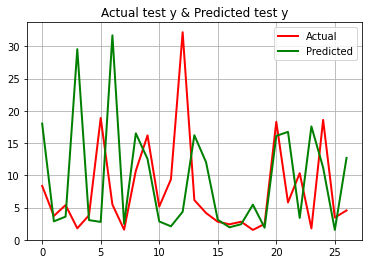

In [ ]:
# visualization
t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label='Actual')
plt.plot(t, y_hat, 'g-', linewidth=2, label='Predicted')
plt.title('Actual test y & Predicted test y')
plt.legend(loc='upper right')
plt.grid()
plt.show()